<a href="https://colab.research.google.com/github/SaulHL08/Iris-RandomForest-Classifier/blob/main/Iris_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ruta al archivo Iris.csv en Google Drive
file_path = "/content/drive/MyDrive/Iris.csv"

# Cargar el conjunto de datos desde Google Drive
data = pd.read_csv(file_path)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data.drop(["Id", "Species"], axis=1)  # Excluimos "Id" y "Species" de las características
y = data["Species"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Imprimir el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 100.00%
Informe de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


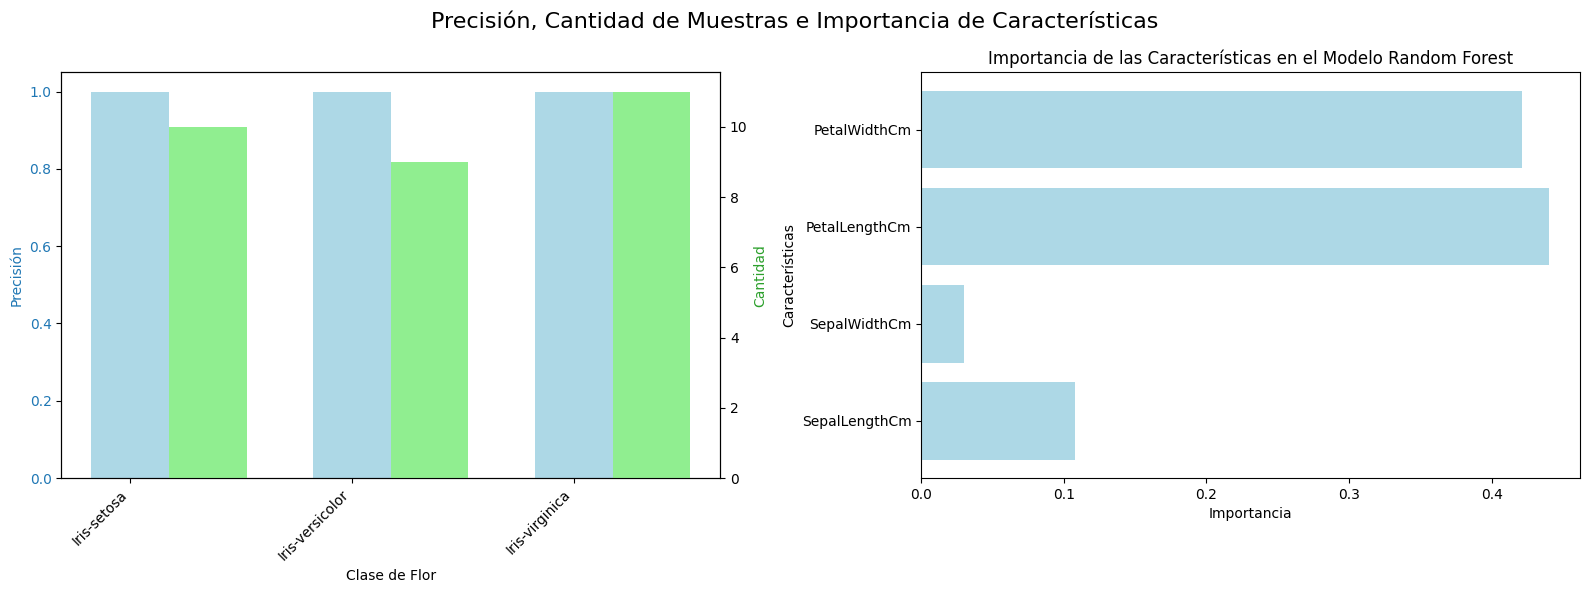

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Clases de flores
classes = data["Species"].unique()

# Precisión por clase
precision_per_class = []
count_per_class = []

for cls in classes:
    correct_predictions = sum((y_test == cls) & (y_pred == cls))
    total_predictions = sum(y_test == cls)
    precision = correct_predictions / total_predictions
    precision_per_class.append(precision)
    count_per_class.append(total_predictions)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Obtener el nombre de las características
feature_names = X.columns

# Crear una figura con subplots y ajustar el tamaño
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Precisión y Cantidad de Muestras por Clase
x = np.arange(len(classes))
width = 0.35

ax1 = axes[0]
ax1.bar(x, precision_per_class, width, label='Precisión', color='lightblue')
ax1.set_xlabel('Clase de Flor')
ax1.set_ylabel('Precisión', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(x)
ax1.set_xticklabels(classes, rotation=45, ha='right')  # Ajusta el ángulo de las etiquetas

ax2 = ax1.twinx()  # Segundo eje y para la cantidad de muestras
ax2.bar(x + width, count_per_class, width, label='Cantidad', color='lightgreen')
ax2.set_ylabel('Cantidad', color='tab:green')

# Gráfico de Importancia de Características
ax3 = axes[1]
ax3.barh(feature_names, feature_importance, color='lightblue')
ax3.set_xlabel('Importancia')
ax3.set_ylabel('Características')
ax3.set_title('Importancia de las Características en el Modelo Random Forest')

# Título general
fig.suptitle('Precisión, Cantidad de Muestras e Importancia de Características', fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()